# Environment settings

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plot
import cv2 as cv
import pandas as pd

/home/michaelfi/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
TRAIN_PATH = 'data/train/'
TEST_PATH = 'data/test/'
NUM_OF_CLASSES = 28

In [3]:
# Set tf basic settings
print(tf.__version__)
tf.logging.set_verbosity(tf.logging.INFO)
tf.enable_eager_execution()

1.10.0


# Dataset manipulation and handling

In [4]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [5]:
def load_image_specific_filter(file):
    img = cv.imread(file)
    img = img.astype(np.float32)
    return img[:,:,0]

In [6]:
train_labels = pd.read_csv(TRAIN_PATH + "train.csv")

In [7]:
train_filename = 'data/tfrec/train.tfrecords'
writer = tf.python_io.TFRecordWriter(train_filename)

for i in range(0,5):                        #train_labels.count()['Id']
    # Create image and labels
    file_name = (TRAIN_PATH + train_labels['Id'][i] + '_green.png')
    img = load_image_specific_filter(file_name)
    labels = np.zeros(shape=(NUM_OF_CLASSES), dtype=int)
    train_label = [int(s) for s in train_labels['Target'][i].split(' ')]
    labels[train_label] = 1
    
    
    # Create a feature
    feature = {'train/label': _int64_feature(labels),
               'train/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()   

In [16]:
def extract_fn(data_record):
    features = {
        # Extract features using the keys set during creation
        'train/label': tf.FixedLenFeature((28), tf.int64),
        'train/image': tf.FixedLenFeature([], tf.string)
    }    
    
    sample = tf.parse_single_example(data_record, features)
    sample['train/image'] = tf.decode_raw(sample['train/image'], tf.float32)
    sample['train/image'] = tf.reshape(sample['train/image'], (512,512))

    return sample



In [17]:
num_epochs = 1
batch_size = 2
buffer_size = 5
# Initialize all tfrecord paths
dataset = tf.data.TFRecordDataset([train_filename])
dataset = dataset.map(extract_fn)
dataset = dataset.apply(tf.contrib.data.shuffle_and_repeat(buffer_size, num_epochs))
dataset = dataset.batch(batch_size)

In [18]:
itr = dataset.make_one_shot_iterator()
for x in itr:
    print(x['train/image'])
#for step, batch in enumerate(dataset):
#   print(batch['train/image'])

tf.Tensor(
[[[ 0.  0.  0. ...  1.  0.  0.]
  [ 0.  0.  0. ...  3.  6.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  2.  0. ...  0.  2.  0.]
  [15.  0.  2. ...  0.  0.  0.]
  [11.  8.  3. ...  0.  2. 13.]]

 [[ 0.  0.  0. ... 32. 51. 15.]
  [ 0.  0.  0. ... 38. 81. 48.]
  [ 0.  0.  0. ... 38. 57. 32.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]], shape=(2, 512, 512), dtype=float32)
tf.Tensor(
[[[1. 1. 1. ... 0. 1. 4.]
  [1. 0. 0. ... 0. 0. 1.]
  [2. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 2.]
  [0. 0. 0. ... 9. 0. 0.]
  [0. 0. 0. ... 0. 5. 5.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]], shape=(2, 512, 512), dtype=float32)
tf.Tensor(
[[[ 9.  6. 27. ...  1.  0.  0.]
  [ 3. 20. 20. ...  0.  0.  0.]
  [52. 15. 36. ... 17.  0.  0.]
  ...
  [10.  0.  2. ...  4.  0.  2.]
  [14.  4.  3. ...  0. 15.  1.]

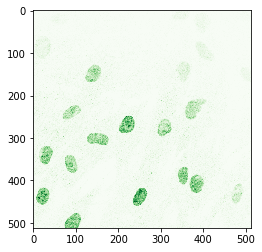

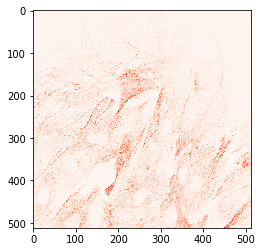

In [78]:
img = load_image_specific_filter('data/train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0_green.png')
imshow(img, cmap="Greens")
plot.show()
img = load_image_specific_filter('data/train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0_red.png')
imshow(img, cmap="Reds")
plot.show()